# Oppgave 2.13

#### Dipol og gradient

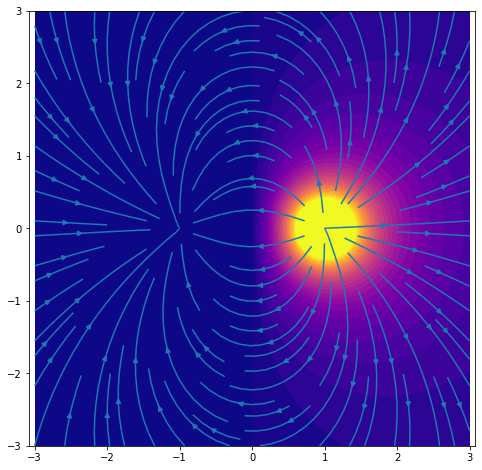

In [45]:
import numpy as np 
import matplotlib.pyplot as plt 

def epot(r, Q, R):
    V = 0.
    for i in range(len(R)):
        Ri = r - R
        Ri_norm = np.linalg.norm(Ri)
        V += Q/Ri_norm
    return V

a = 1
q = 1
q2 = -q
L = 3
N = 100

R1 = np.array([a,0,0])
R2 = np.array([-a,0,0])

x = np.linspace(-L,L,N)
y = np.linspace(-L,L,N)

rx, ry = np.meshgrid(x,y)
V = np.zeros((N,N), float)

for i in range(len(rx.flat)):
    r = np.array([rx.flat[i], ry.flat[i], 0])
    V.flat[i] = epot(r, q, R1) + epot(r, q2, R2)

plt.figure(figsize=(8,8))
levels = np.arange(0, 3.5+2.5, 0.2)
contour_plot = plt.contourf(rx, ry, V, 10, cmap='plasma', levels=levels, extend='both')
plt.axis('equal')

Ey, Ex = np.gradient(-V)
E_norm = np.sqrt(Ex**2 + Ey**2)
uEx = Ex / E_norm
uEy = Ey / E_norm
# plt.quiver(rx[::4,::4], ry[::4,::4], uEx[::4,::4], uEy[::4,::4])
plt.streamplot(rx, ry, Ex, Ey)